Experiment to see how LR changes with each LR Scheduler to try and model a Scheduler to be used for training

In [ ]:
import torch
import matplotlib.pyplot as plt


In [11]:
#dummy model for testing
class Test_model(torch.nn.Module):
    def __init__(self):
        super(Test_model, self).__init__()
        self.fc1 = torch.nn.Linear(1,1)
        
    def forward(self, x):
        return torch.ones_like(x)

test_model = Test_model()

In [97]:
EPOCHS = 100
optimiser_lr = 1e-3
dummy_optim_1 = torch.optim.Adam(test_model.parameters(),optimiser_lr)


lr_cosine_annealing = []
cosine_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(dummy_optim_1,T_max=EPOCHS)

for _ in range(EPOCHS):
    lr_cosine_annealing.append(cosine_scheduler.get_last_lr())
    cosine_scheduler.step()


In [98]:
EPOCHS = 100
optimiser_lr = 1e-5

dummy_optim_1 = torch.optim.Adam(test_model.parameters(), optimiser_lr)
dummy_optim_2 = torch.optim.SGD(test_model.parameters(), optimiser_lr, momentum=0.9)

lr_cyclic_decay = []
cyclic_scheduler = torch.optim.lr_scheduler.CyclicLR(
    dummy_optim_1, base_lr=1e-7, mode="triangular2", max_lr=1e-3, cycle_momentum=False, step_size_up=10, gamma=0.1
)

for _ in range(EPOCHS):
    lr_cyclic_decay.append(cyclic_scheduler.get_last_lr())
    cyclic_scheduler.step()


In [116]:
EPOCHS = 100
optimiser_lr = 1e-5

dummy_optim_1 = torch.optim.Adam(test_model.parameters(), optimiser_lr)
dummy_optim_2 = torch.optim.SGD(test_model.parameters(), optimiser_lr, momentum=0.9)

lr_cyclic_one = []
cyclic_scheduler_one = torch.optim.lr_scheduler.OneCycleLR(
    dummy_optim_1, epochs=int(EPOCHS/10), steps_per_epoch=1,cycle_momentum=False, max_lr=1e-3
)

for _ in range(EPOCHS):
    lr_cyclic_one.append(cyclic_scheduler_one.get_last_lr())
    cyclic_scheduler_one.step()

c:\Users\ibrah\miniconda3\envs\fyp\lib\site-packages\torch\optim\lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


ValueError: Tried to step 12 times. The specified number of total steps is 10

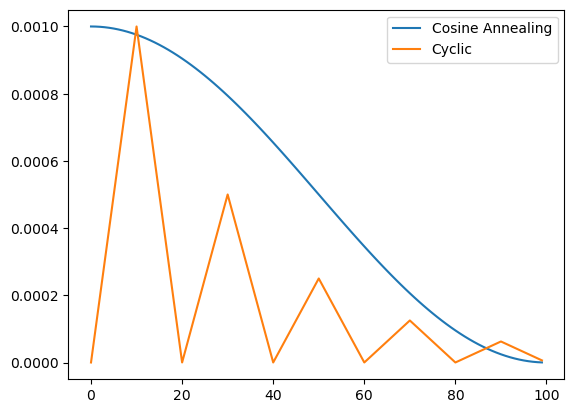

In [118]:
# plt.plot(lr_cosine_annealing,label="CA")
plt.plot(lr_cosine_annealing,label="Cosine Annealing")
plt.plot(lr_cyclic_decay,label="Cyclic")
# plt.plot(lr_cyclic_one,label="One Cyclic")

plt.legend()